<a href="https://colab.research.google.com/github/Labannya1038/Machine-Learning/blob/main/Arrhythmia_data_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1) Imports & Setup**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


## **2) Load the Dataset**

In [3]:
# URL for the Arrhythmia dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data"

# load dataset (no headers in this file)
df = pd.read_csv(url, header=None)

# show shape
print("Dataset Shape:", df.shape)

# preview data
df.head()


Dataset Shape: (452, 280)


,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


**3) Assign Column Names**

In [4]:
# Generate column names
cols = ["feature_" + str(i) for i in range(279)] + ["target"]

df.columns = cols
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_270,feature_271,feature_272,feature_273,feature_274,feature_275,feature_276,feature_277,feature_278,target
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


**4) Explore Missing Values**

In [5]:
# Replace "?" with NaN
df.replace("?", np.nan, inplace=True)

print("Missing Values per Column:")
print(df.isnull().sum().sort_values(ascending=False).head(10))

Missing Values per Column:
feature_13     376
feature_11      22
feature_10       8
feature_14       1
feature_12       1
feature_189      0
feature_187      0
feature_186      0
feature_185      0
feature_184      0
dtype: int64


**5) Handle Missing Data**

In [6]:
df = df.apply(pd.to_numeric, errors="coerce")
df.fillna(df.median(), inplace=True)

print("After Imputation Missing Values:", df.isnull().sum().sum())

After Imputation Missing Values: 0


**6) Separate Features & Labels**

In [7]:
X = df.drop("target", axis=1)
y = df["target"]

**7) Train/Test Split**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (361, 279)
Test size: (91, 279)


**8) Feature Scaling**

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**9) Baseline Logistic Regression (No Regularization)**

In [10]:
model_base = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='auto')
model_base.fit(X_train_scaled, y_train)

pred_train = model_base.predict(X_train_scaled)
pred_test = model_base.predict(X_test_scaled)

print("Training Accuracy:", accuracy_score(y_train, pred_train))
print("Testing Accuracy:", accuracy_score(y_test, pred_test))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Training Accuracy: 1.0
Testing Accuracy: 0.6813186813186813


**10) Logistic Regression with Regularization-L2 Regularization**

In [11]:
model_l2 = LogisticRegression(
    penalty='l2',
    solver='lbfgs',
    max_iter=2000,
    multi_class='auto'
)
model_l2.fit(X_train_scaled, y_train)

print("L2 Train Acc:", accuracy_score(y_train, model_l2.predict(X_train_scaled)))
print("L2 Test Acc:", accuracy_score(y_test, model_l2.predict(X_test_scaled)))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


L2 Train Acc: 1.0
L2 Test Acc: 0.6813186813186813


**L1 Regularization**

In [12]:
model_l1 = LogisticRegression(
    penalty='l1',
    solver='saga',
    max_iter=2000,
    multi_class='auto'
)
model_l1.fit(X_train_scaled, y_train)

print("L1 Train Acc:", accuracy_score(y_train, model_l1.predict(X_train_scaled)))
print("L1 Test Acc:", accuracy_score(y_test, model_l1.predict(X_test_scaled)))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


L1 Train Acc: 0.9778393351800554
L1 Test Acc: 0.6923076923076923


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


**ElasticNet Regularization**

In [13]:
model_en = LogisticRegression(
    penalty='elasticnet',
    solver='saga',
    l1_ratio=0.5,
    max_iter=3000,
    multi_class='auto'
)
model_en.fit(X_train_scaled, y_train)

print("ElasticNet Train Acc:", accuracy_score(y_train, model_en.predict(X_train_scaled)))
print("ElasticNet Test Acc:", accuracy_score(y_test, model_en.predict(X_test_scaled)))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


ElasticNet Train Acc: 0.9861495844875346
ElasticNet Test Acc: 0.6923076923076923


**11) Confusion Matrix & Classification Report**

Classification Report (L2):
              precision    recall  f1-score   support

           1       0.77      0.90      0.83        49
           2       0.60      0.67      0.63         9
           3       0.75      1.00      0.86         3
           4       0.67      0.67      0.67         3
           5       0.00      0.00      0.00         3
           6       0.25      0.20      0.22         5
           7       0.00      0.00      0.00         1
           9       1.00      0.50      0.67         2
          10       0.83      0.50      0.62        10
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         4

    accuracy                           0.68        91
   macro avg       0.41      0.37      0.37        91
weighted avg       0.65      0.68      0.66        91



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


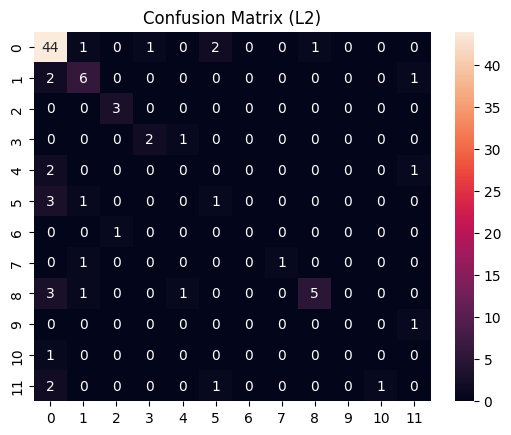

In [14]:
print("Classification Report (L2):")
print(classification_report(y_test, model_l2.predict(X_test_scaled)))

sns.heatmap(
    confusion_matrix(y_test, model_l2.predict(X_test_scaled)),
    annot=True, fmt="d"
)
plt.title("Confusion Matrix (L2)")
plt.show()

**12) Compare Model Accuracies**

In [15]:
results = pd.DataFrame({
    "Model": ["Baseline", "L2", "L1", "ElasticNet"],
    "Train Acc": [
        accuracy_score(y_train, pred_train),
        accuracy_score(y_train, model_l2.predict(X_train_scaled)),
        accuracy_score(y_train, model_l1.predict(X_train_scaled)),
        accuracy_score(y_train, model_en.predict(X_train_scaled)),
    ],
    "Test Acc": [
        accuracy_score(y_test, pred_test),
        accuracy_score(y_test, model_l2.predict(X_test_scaled)),
        accuracy_score(y_test, model_l1.predict(X_test_scaled)),
        accuracy_score(y_test, model_en.predict(X_test_scaled)),
    ]
})

results

,Model,Train Acc,Test Acc
0,Baseline,1.000000,0.681319
1,L2,1.000000,0.681319
2,L1,0.977839,0.692308
3,ElasticNet,0.986150,0.692308


**13) Logistic Regression – Training & Testing Accuracy**

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Logistic Regression model (baseline)
log_reg = LogisticRegression(
    max_iter=2000,
    solver="lbfgs",
    multi_class="auto"
)

# Train model
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = log_reg.predict(X_train_scaled)
y_test_pred = log_reg.predict(X_test_scaled)

# Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_acc)
print("Testing Accuracy :", test_acc)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Training Accuracy: 1.0
Testing Accuracy : 0.6813186813186813


**14) Overfitting Observation (Training vs Validation Curve)**

In [17]:
import numpy as np
import matplotlib.pyplot as plt

alphas = np.logspace(-2, 1, 20)   # alpha values
train_scores = []
val_scores = []

for alpha in alphas:
    model = LogisticRegression(
        C=1/alpha,
        max_iter=2000,
        solver="lbfgs",
        multi_class="auto"
    )

    model.fit(X_train_scaled, y_train)

    train_scores.append(model.score(X_train_scaled, y_train))
    val_scores.append(model.score(X_test_scaled, y_test))


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

**15) Overfitting Plot**

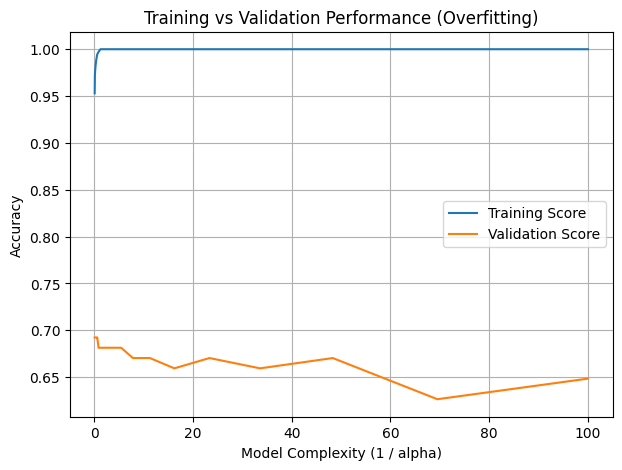

In [18]:
plt.figure(figsize=(7,5))
plt.plot(1/alphas, train_scores, label="Training Score")
plt.plot(1/alphas, val_scores, label="Validation Score")

plt.xlabel("Model Complexity (1 / alpha)")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Performance (Overfitting)")
plt.legend()
plt.grid(True)
plt.show()

**16) Finding Number of Features Used by Each Regularization**

In [19]:
from sklearn.linear_model import LogisticRegression
import numpy as np

alphas = [1.0, 0.1, 0.01]

for alpha in alphas:
    print(f"\nAlpha = {alpha}")

    # LASSO (L1)
    lasso = LogisticRegression(
        penalty="l1",
        solver="saga",
        C=1/alpha,
        max_iter=3000,
        multi_class="auto"
    )
    lasso.fit(X_train_scaled, y_train)
    lasso_features = np.sum(lasso.coef_ != 0)

    # Ridge (L2)
    ridge = LogisticRegression(
        penalty="l2",
        C=1/alpha,
        max_iter=3000,
        solver="lbfgs",
        multi_class="auto"
    )
    ridge.fit(X_train_scaled, y_train)
    ridge_features = np.sum(ridge.coef_ != 0)

    # ElasticNet
    elastic = LogisticRegression(
        penalty="elasticnet",
        solver="saga",
        l1_ratio=0.5,
        C=1/alpha,
        max_iter=3000,
        multi_class="auto"
    )
    elastic.fit(X_train_scaled, y_train)
    elastic_features = np.sum(elastic.coef_ != 0)

    print("Lasso features used       :", lasso_features)
    print("ElasticNet features used  :", elastic_features)
    print("Ridge features used       :", ridge_features)



Alpha = 1.0


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid t

Lasso features used       : 338
ElasticNet features used  : 603
Ridge features used       : 3328

Alpha = 0.1


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid t

Lasso features used       : 1141
ElasticNet features used  : 1643
Ridge features used       : 3328

Alpha = 0.01


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Lasso features used       : 2881
ElasticNet features used  : 3171
Ridge features used       : 3328


**17) Hyperparameter Tuning (C Value Analysis)**

In [20]:
C_values = [0.01, 0.1, 1, 10]

print("C Value | Training Accuracy | Testing Accuracy")
print("---------------------------------------------")

for C in C_values:
    model = LogisticRegression(
        penalty="l2",
        C=C,
        solver="lbfgs",
        max_iter=3000,
        multi_class="auto"
    )

    model.fit(X_train_scaled, y_train)

    train_acc = model.score(X_train_scaled, y_train)
    test_acc = model.score(X_test_scaled, y_test)

    print(f"{C:<6} | {train_acc:.4f}            | {test_acc:.4f}")

C Value | Training Accuracy | Testing Accuracy
---------------------------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


0.01   | 0.7978            | 0.6813


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


0.1    | 0.9529            | 0.6923


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


1      | 1.0000            | 0.6813


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


10     | 1.0000            | 0.6703
